In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

## Import

In [2]:
dataset = pd.read_csv('../Classification-Data.csv')
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

## Missing Data

In [4]:
dataset.isna().sum(axis=1).sum()

0

## Encoding

In [5]:
dataset.describe(include='all')

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
dataset['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [10]:
y.shape

(683,)

## Train-test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training

In [15]:
from collections import defaultdict

In [16]:
models = defaultdict(dict)

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [19]:
models['Logistic_Regression']['y_pred'] = classifier.predict(X_test_scaled)

## K Nearest Neighbours

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
classifier = KNeighborsClassifier()
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [22]:
models['KNN']['y_pred'] = classifier.predict(X_test_scaled)

## SVM (Linear)

In [23]:
from sklearn.svm import SVC

In [24]:
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train_scaled,y_train)

SVC(kernel='linear', random_state=0)

In [25]:
models['SVM_linear']['y_pred'] = classifier.predict(X_test_scaled)

## Kernel SVM

In [26]:
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train_scaled,y_train)

SVC(random_state=0)

In [27]:
models['Kernel_SVM']['y_pred'] = classifier.predict(X_test_scaled)

## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
classifier = GaussianNB()
classifier.fit(X_train_scaled,y_train)

GaussianNB()

In [30]:
models['Naive_Bayes']['y_pred'] = classifier.predict(X_test_scaled)

## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
models['Decision_Tree']['y_pred'] = classifier.predict(X_test_scaled)

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [36]:
models['Random_Forest']['y_pred'] = classifier.predict(X_test_scaled)

# Evaluation

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [40]:
for i in models:
    y_pred = models[i]['y_pred']
    models[i]['accuracy'] = accuracy_score(y_test,y_pred)
    models[i]['cf'] = confusion_matrix(y_test,y_pred)

In [68]:
models = dict(sorted(models.items(), key=lambda x: -x[1]['accuracy']))

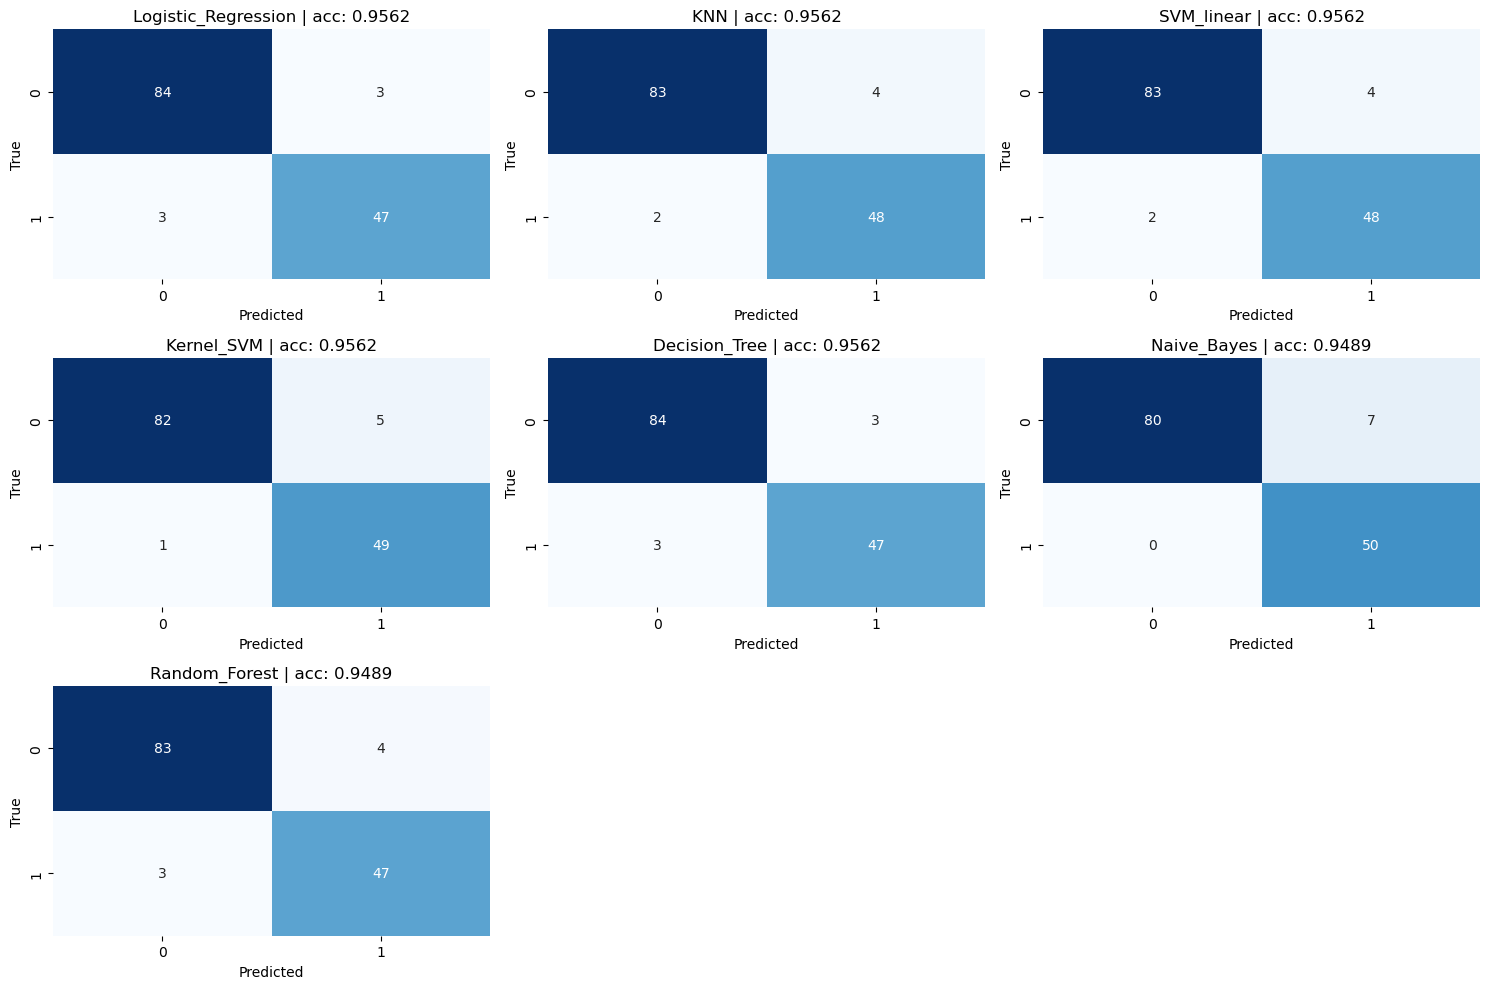

In [69]:
fig, axs = plt.subplots(3,3,figsize=(15,10))
axs = axs.flatten()

for i,v in enumerate(models):
    # Plot cf with sns
    sns.heatmap(models[v]['cf'],annot=True,cmap='Blues',cbar=False,ax=axs[i])
    
    # Set the title and labels for each subplot
    axs[i].set_title(f'{v} | acc: {models[v]["accuracy"]:.4f}')
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('True')

# Remove empty plots
for i in (len(models),len(axs)-1):
    fig.delaxes(axs[i])

plt.tight_layout()